## 1) Recovered & Active Cases from worldometers.info

In [1]:
import bs4 as bs
from urllib import request
import pandas as pd
import matplotlib.pyplot as plt
import requests

page = requests.get('https://www.worldometers.info/coronavirus/')

soup = bs.BeautifulSoup(page.text, 'html.parser')
print(soup.title.text)
# print(soup.find_all('p'))

htmltable = soup.find_all('table', { 'id' : 'main_table_countries_today' })
htmltable
# df = pd.read_html(str(htmltable))[0]

Coronavirus Update (Live): 9,919,525 Cases and 497,255 Deaths from COVID-19 Virus Pandemic - Worldometer


[<table class="table table-bordered table-hover main_table_countries" id="main_table_countries_today" style="width:100%;margin-top: 0px !important;display:none;">
 <thead>
 <tr>
 <th width="1%">#</th>
 <th width="100">Country,<br>Other</br></th>
 <th width="20">Total<br>Cases</br></th>
 <th width="30">New<br>Cases</br></th>
 <th width="30">Total<br>Deaths</br></th>
 <th width="30">New<br>Deaths</br></th>
 <th width="30">Total<br>Recovered</br></th>
 <th width="30">New<br>Recovered</br></th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 </tr>
 </thead>
 <tbody>
 <tr cla

In [2]:
import pandas as pd
l=[]
c=1

column = ['index','SNO','Country,Other','TotalCases','NewCases','TotalDeaths','NewDeaths','TotalRecovered','NewRecovered','ActiveCases','Serious,Critical','Tot Cases/1M pop','Deaths/1M pop','Total Tests','Tests/1M pop','Population','Continent','17','18','19','20','21']
#           TotalTests','Tests/1M pop','Population',
#           '1 Case every X ppl','1 Death every X ppl','1 Test every X ppl']

df = pd.DataFrame(columns = column)

for i in htmltable[0].find_all('tr'):
    if c<10:
        pass
    else:
#        
        l.append(i.text)
#         print(i.text)
    c=c+1
nl = []
for j in l:
    j.split('\n')
    nl.append(j.split('\n'))
nl
pd.set_option('display.max_columns',None)
df = pd.DataFrame(nl, columns = column)
df.head()
#     l.append(i.text)
#     for j in i.find_all('td',{"class":"mt_a"}):
#         print(j)

,index,SNO,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Continent,17,18,19,20,21
0,,1,USA,"2,553,068",+112,"127,640",,"1,068,768",+65,"1,356,660","15,765","7,714",386,"31,354,678","94,733","330,981,104",North America,"1302,59311",,None,None,None
1,,2,Brazil,"1,280,054",,"56,109",,"697,526",,"526,419","8,318","6,023",264,"2,925,935","13,766","212,541,690",South America,"1663,78873",,None,None,None
2,,3,Russia,"627,646","+6,852","8,969",+188,"393,352","+9,200","225,325","2,300","4,301",61,"18,700,000","128,140","145,933,938",Europe,"23316,2718",,None,None,None
3,,4,India,"509,753",+307,"15,700",+11,"296,030",+113,"198,023","8,944",369,11,"7,996,707","5,795","1,379,826,344",Asia,"2,70787,887173",,None,None,None
4,,5,UK,"309,360",,"43,414",,N/A,N/A,N/A,311,"4,557",640,"8,911,226","131,275","67,882,162",Europe,"2191,5648",,None,None,None


In [3]:
# df = df.iloc[1:19,1:]
df = df.iloc[:215,2:16]
df

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"2,553,068",+112,"127,640",,"1,068,768",+65,"1,356,660","15,765","7,714",386,"31,354,678","94,733","330,981,104"
1,Brazil,"1,280,054",,"56,109",,"697,526",,"526,419","8,318","6,023",264,"2,925,935","13,766","212,541,690"
2,Russia,"627,646","+6,852","8,969",+188,"393,352","+9,200","225,325","2,300","4,301",61,"18,700,000","128,140","145,933,938"
3,India,"509,753",+307,"15,700",+11,"296,030",+113,"198,023","8,944",369,11,"7,996,707","5,795","1,379,826,344"
4,UK,"309,360",,"43,414",,N/A,N/A,N/A,311,"4,557",640,"8,911,226","131,275","67,882,162"
5,Spain,"294,985",,"28,338",,N/A,N/A,N/A,617,"6,309",606,"5,162,909","110,426","46,754,627"
6,Peru,"272,364",,"8,939",,"159,806",,"103,619","1,172","8,262",271,"1,604,521","48,674","32,964,854"
7,Chile,"263,360",,"5,068",,"223,431",,"34,861","2,086","13,778",265,"1,043,330","54,584","19,114,153"
8,Italy,"239,961",,"34,708",,"187,615",,"17,638",105,"3,969",574,"5,215,922","86,267","60,462,488"
9,Iran,"217,724",,"10,239",,"177,852",,"29,633","2,912","2,593",122,"1,557,872","18,551","83,977,195"


In [4]:
df.dtypes

Country,Other       object
TotalCases          object
NewCases            object
TotalDeaths         object
NewDeaths           object
TotalRecovered      object
NewRecovered        object
ActiveCases         object
Serious,Critical    object
Tot Cases/1M pop    object
Deaths/1M pop       object
Total Tests         object
Tests/1M pop        object
Population          object
dtype: object

In [5]:
cols = ['TotalCases', 'NewCases', 'TotalDeaths','NewDeaths', 'TotalRecovered', 'NewRecovered', 'ActiveCases','Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop', 'Total Tests','Tests/1M pop', 'Population']
ndf = df[cols]
ndf = ndf.apply(lambda x: pd.to_numeric(x.astype(str).str.replace(',',''), errors = 'coerce'))
ndf.head()

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,2553068,112.0,127640.0,NaN,1068768.0,65.0,1356660.0,15765.0,7714.0,386.0,31354678.0,94733.0,3.309811e+08
1,1280054,NaN,56109.0,NaN,697526.0,NaN,526419.0,8318.0,6023.0,264.0,2925935.0,13766.0,2.125417e+08
2,627646,6852.0,8969.0,188.0,393352.0,9200.0,225325.0,2300.0,4301.0,61.0,18700000.0,128140.0,1.459339e+08
3,509753,307.0,15700.0,11.0,296030.0,113.0,198023.0,8944.0,369.0,11.0,7996707.0,5795.0,1.379826e+09
4,309360,NaN,43414.0,NaN,NaN,NaN,NaN,311.0,4557.0,640.0,8911226.0,131275.0,6.788216e+07


In [6]:
nndf = pd.concat([df['Country,Other'],ndf], axis = 1)
nndf

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,2553068,112.0,127640.0,NaN,1068768.0,65.0,1356660.0,15765.0,7714.0,386.0,31354678.0,94733.0,3.309811e+08
1,Brazil,1280054,NaN,56109.0,NaN,697526.0,NaN,526419.0,8318.0,6023.0,264.0,2925935.0,13766.0,2.125417e+08
2,Russia,627646,6852.0,8969.0,188.0,393352.0,9200.0,225325.0,2300.0,4301.0,61.0,18700000.0,128140.0,1.459339e+08
3,India,509753,307.0,15700.0,11.0,296030.0,113.0,198023.0,8944.0,369.0,11.0,7996707.0,5795.0,1.379826e+09
4,UK,309360,NaN,43414.0,NaN,NaN,NaN,NaN,311.0,4557.0,640.0,8911226.0,131275.0,6.788216e+07
5,Spain,294985,NaN,28338.0,NaN,NaN,NaN,NaN,617.0,6309.0,606.0,5162909.0,110426.0,4.675463e+07
6,Peru,272364,NaN,8939.0,NaN,159806.0,NaN,103619.0,1172.0,8262.0,271.0,1604521.0,48674.0,3.296485e+07
7,Chile,263360,NaN,5068.0,NaN,223431.0,NaN,34861.0,2086.0,13778.0,265.0,1043330.0,54584.0,1.911415e+07
8,Italy,239961,NaN,34708.0,NaN,187615.0,NaN,17638.0,105.0,3969.0,574.0,5215922.0,86267.0,6.046249e+07
9,Iran,217724,NaN,10239.0,NaN,177852.0,NaN,29633.0,2912.0,2593.0,122.0,1557872.0,18551.0,8.397720e+07


In [7]:
nndf.dtypes

Country,Other        object
TotalCases            int64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
Total Tests         float64
Tests/1M pop        float64
Population          float64
dtype: object

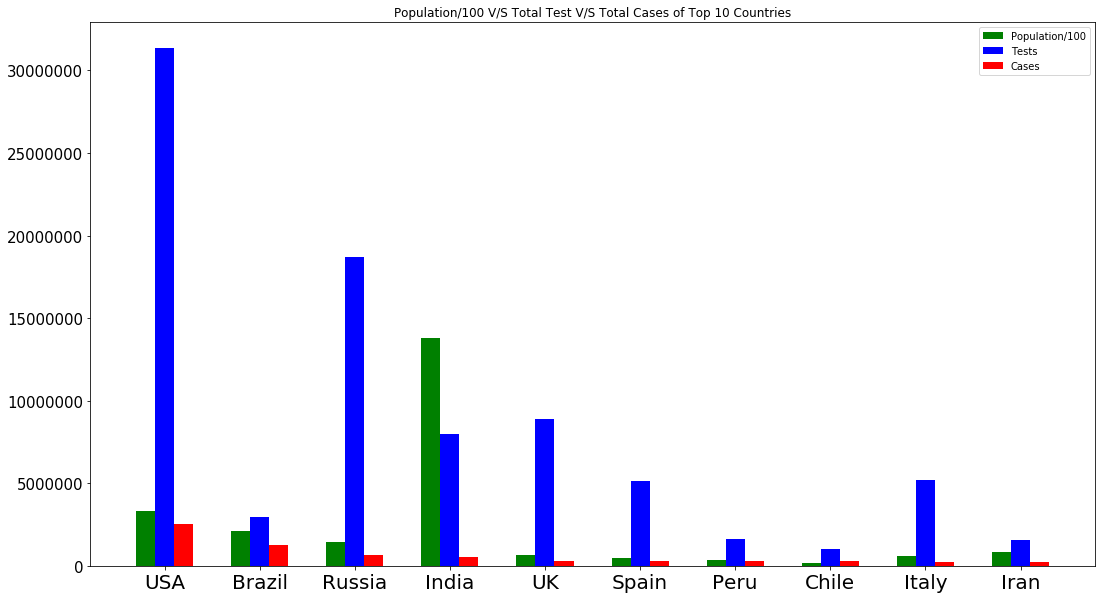

In [19]:
import matplotlib.pyplot as plt
import numpy as np

nndf = nndf.iloc[:10,:]
x = len(nndf['Country,Other'])
y1 = nndf['Population']/100
y2 = nndf['Total Tests']
y3 = nndf['TotalCases']

fig, ax = plt.subplots(figsize = (18,10))
indx = np.arange(1, x+1)
bar_width = 0.20

b1 = plt.bar(indx, y1, bar_width, color = 'green', label = 'Population/100')
b2 = plt.bar(indx + bar_width, y2, bar_width, color = 'blue', label = 'Tests')
b3 = plt.bar(indx + bar_width + bar_width, y3, bar_width,color = 'red', label = 'Cases')

plt.ticklabel_format(useOffset = False, style = 'plain')

plt.xticks(indx+bar_width, nndf['Country,Other'], fontsize = '20')
plt.yticks(fontsize = '15')
plt.title('Population/100 V/S Total Test V/S Total Cases of Top 10 Countries')
plt.legend()
plt.show()

3


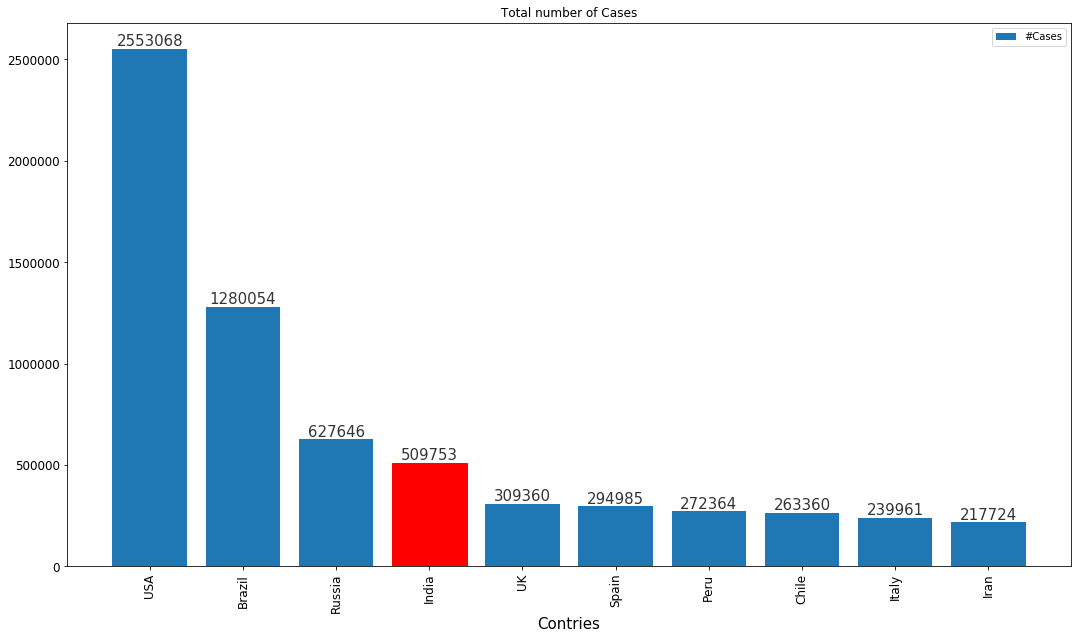

In [25]:
'''
s = 5
df1 = df.iloc[s:25,:]
'''
plt.figure(figsize=(18,10))
i = nndf[nndf['Country,Other'] == 'India'].index[0]
print(i)
bar = plt.bar(nndf['Country,Other'],nndf['TotalCases'], label = '#Cases')
bar[i].set_color('r')
plt.xticks(rotation = 90, size = 12)
plt.yticks(size = 12)
plt.xlabel('Contries', size = 15)
for i, j in enumerate(nndf['TotalCases']):
    plt.text(i,j, s=j, fontdict=dict(fontsize=15), ha='center', verticalalignment='bottom', alpha=0.8)
plt.title('Total number of Cases')
plt.legend()
plt.show()

In [39]:
nndf

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,2553068,112.0,127640.0,NaN,1068768.0,65.0,1356660.0,15765.0,7714.0,386.0,31354678.0,94733.0,3.309811e+08
1,Brazil,1280054,NaN,56109.0,NaN,697526.0,NaN,526419.0,8318.0,6023.0,264.0,2925935.0,13766.0,2.125417e+08
2,Russia,627646,6852.0,8969.0,188.0,393352.0,9200.0,225325.0,2300.0,4301.0,61.0,18700000.0,128140.0,1.459339e+08
3,India,509753,307.0,15700.0,11.0,296030.0,113.0,198023.0,8944.0,369.0,11.0,7996707.0,5795.0,1.379826e+09
4,UK,309360,NaN,43414.0,NaN,NaN,NaN,NaN,311.0,4557.0,640.0,8911226.0,131275.0,6.788216e+07
5,Spain,294985,NaN,28338.0,NaN,NaN,NaN,NaN,617.0,6309.0,606.0,5162909.0,110426.0,4.675463e+07
6,Peru,272364,NaN,8939.0,NaN,159806.0,NaN,103619.0,1172.0,8262.0,271.0,1604521.0,48674.0,3.296485e+07
7,Chile,263360,NaN,5068.0,NaN,223431.0,NaN,34861.0,2086.0,13778.0,265.0,1043330.0,54584.0,1.911415e+07
8,Italy,239961,NaN,34708.0,NaN,187615.0,NaN,17638.0,105.0,3969.0,574.0,5215922.0,86267.0,6.046249e+07
9,Iran,217724,NaN,10239.0,NaN,177852.0,NaN,29633.0,2912.0,2593.0,122.0,1557872.0,18551.0,8.397720e+07


In [50]:
# nndf = nndf.set_index('Country,Other')
nndf.drop(index = ['UK','Spain'], inplace = True)
nndf

,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
"Country,Other",,,,,,,,,,,,,
USA,2553068,112.0,127640.0,NaN,1068768.0,65.0,1356660.0,15765.0,7714.0,386.0,31354678.0,94733.0,3.309811e+08
Brazil,1280054,NaN,56109.0,NaN,697526.0,NaN,526419.0,8318.0,6023.0,264.0,2925935.0,13766.0,2.125417e+08
Russia,627646,6852.0,8969.0,188.0,393352.0,9200.0,225325.0,2300.0,4301.0,61.0,18700000.0,128140.0,1.459339e+08
India,509753,307.0,15700.0,11.0,296030.0,113.0,198023.0,8944.0,369.0,11.0,7996707.0,5795.0,1.379826e+09
Peru,272364,NaN,8939.0,NaN,159806.0,NaN,103619.0,1172.0,8262.0,271.0,1604521.0,48674.0,3.296485e+07
Chile,263360,NaN,5068.0,NaN,223431.0,NaN,34861.0,2086.0,13778.0,265.0,1043330.0,54584.0,1.911415e+07
Italy,239961,NaN,34708.0,NaN,187615.0,NaN,17638.0,105.0,3969.0,574.0,5215922.0,86267.0,6.046249e+07
Iran,217724,NaN,10239.0,NaN,177852.0,NaN,29633.0,2912.0,2593.0,122.0,1557872.0,18551.0,8.397720e+07


In [55]:
nndf.reset_index(inplace = True)
nndf

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,2553068,112.0,127640.0,NaN,1068768.0,65.0,1356660.0,15765.0,7714.0,386.0,31354678.0,94733.0,3.309811e+08
1,Brazil,1280054,NaN,56109.0,NaN,697526.0,NaN,526419.0,8318.0,6023.0,264.0,2925935.0,13766.0,2.125417e+08
2,Russia,627646,6852.0,8969.0,188.0,393352.0,9200.0,225325.0,2300.0,4301.0,61.0,18700000.0,128140.0,1.459339e+08
3,India,509753,307.0,15700.0,11.0,296030.0,113.0,198023.0,8944.0,369.0,11.0,7996707.0,5795.0,1.379826e+09
4,Peru,272364,NaN,8939.0,NaN,159806.0,NaN,103619.0,1172.0,8262.0,271.0,1604521.0,48674.0,3.296485e+07
5,Chile,263360,NaN,5068.0,NaN,223431.0,NaN,34861.0,2086.0,13778.0,265.0,1043330.0,54584.0,1.911415e+07
6,Italy,239961,NaN,34708.0,NaN,187615.0,NaN,17638.0,105.0,3969.0,574.0,5215922.0,86267.0,6.046249e+07
7,Iran,217724,NaN,10239.0,NaN,177852.0,NaN,29633.0,2912.0,2593.0,122.0,1557872.0,18551.0,8.397720e+07


In [82]:
nndf = pd.concat([df['Country,Other'],ndf], axis = 1)
nndf

,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,2553068,112.0,127640.0,NaN,1068768.0,65.0,1356660.0,15765.0,7714.0,386.0,31354678.0,94733.0,3.309811e+08
1,Brazil,1280054,NaN,56109.0,NaN,697526.0,NaN,526419.0,8318.0,6023.0,264.0,2925935.0,13766.0,2.125417e+08
2,Russia,627646,6852.0,8969.0,188.0,393352.0,9200.0,225325.0,2300.0,4301.0,61.0,18700000.0,128140.0,1.459339e+08
3,India,509753,307.0,15700.0,11.0,296030.0,113.0,198023.0,8944.0,369.0,11.0,7996707.0,5795.0,1.379826e+09
4,UK,309360,NaN,43414.0,NaN,NaN,NaN,NaN,311.0,4557.0,640.0,8911226.0,131275.0,6.788216e+07
5,Spain,294985,NaN,28338.0,NaN,NaN,NaN,NaN,617.0,6309.0,606.0,5162909.0,110426.0,4.675463e+07
6,Peru,272364,NaN,8939.0,NaN,159806.0,NaN,103619.0,1172.0,8262.0,271.0,1604521.0,48674.0,3.296485e+07
7,Chile,263360,NaN,5068.0,NaN,223431.0,NaN,34861.0,2086.0,13778.0,265.0,1043330.0,54584.0,1.911415e+07
8,Italy,239961,NaN,34708.0,NaN,187615.0,NaN,17638.0,105.0,3969.0,574.0,5215922.0,86267.0,6.046249e+07
9,Iran,217724,NaN,10239.0,NaN,177852.0,NaN,29633.0,2912.0,2593.0,122.0,1557872.0,18551.0,8.397720e+07


In [113]:
# nndf = nndf.iloc[:20,:]
# nndf = nndf.set_index('Country,Other')
# nndf = nndf.drop(['Spain', 'UK'])
# nndf.reset_index(inplace = True)
nndf['Recovered %age'] = (nndf['TotalRecovered']/nndf['TotalCases'])*100
nndf = nndf.round({'Recovered %age' : 1})
nndf

,level_0,index,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population,Recovered %age
0,0,0,USA,2553068,112.0,127640.0,NaN,1068768.0,65.0,1356660.0,15765.0,7714.0,386.0,31354678.0,94733.0,3.309811e+08,41.9
1,1,1,Brazil,1280054,NaN,56109.0,NaN,697526.0,NaN,526419.0,8318.0,6023.0,264.0,2925935.0,13766.0,2.125417e+08,54.5
2,2,2,Russia,627646,6852.0,8969.0,188.0,393352.0,9200.0,225325.0,2300.0,4301.0,61.0,18700000.0,128140.0,1.459339e+08,62.7
3,3,3,India,509753,307.0,15700.0,11.0,296030.0,113.0,198023.0,8944.0,369.0,11.0,7996707.0,5795.0,1.379826e+09,58.1
4,4,4,Peru,272364,NaN,8939.0,NaN,159806.0,NaN,103619.0,1172.0,8262.0,271.0,1604521.0,48674.0,3.296485e+07,58.7
5,5,5,Chile,263360,NaN,5068.0,NaN,223431.0,NaN,34861.0,2086.0,13778.0,265.0,1043330.0,54584.0,1.911415e+07,84.8
6,6,6,Italy,239961,NaN,34708.0,NaN,187615.0,NaN,17638.0,105.0,3969.0,574.0,5215922.0,86267.0,6.046249e+07,78.2
7,7,7,Iran,217724,NaN,10239.0,NaN,177852.0,NaN,29633.0,2912.0,2593.0,122.0,1557872.0,18551.0,8.397720e+07,81.7
8,8,8,Mexico,208392,5441.0,25779.0,719.0,120562.0,3700.0,62051.0,378.0,1617.0,200.0,542120.0,4205.0,1.289145e+08,57.9
9,9,9,Pakistan,198883,3138.0,4035.0,73.0,86906.0,2738.0,107942.0,2729.0,901.0,18.0,1214140.0,5498.0,2.208146e+08,43.7


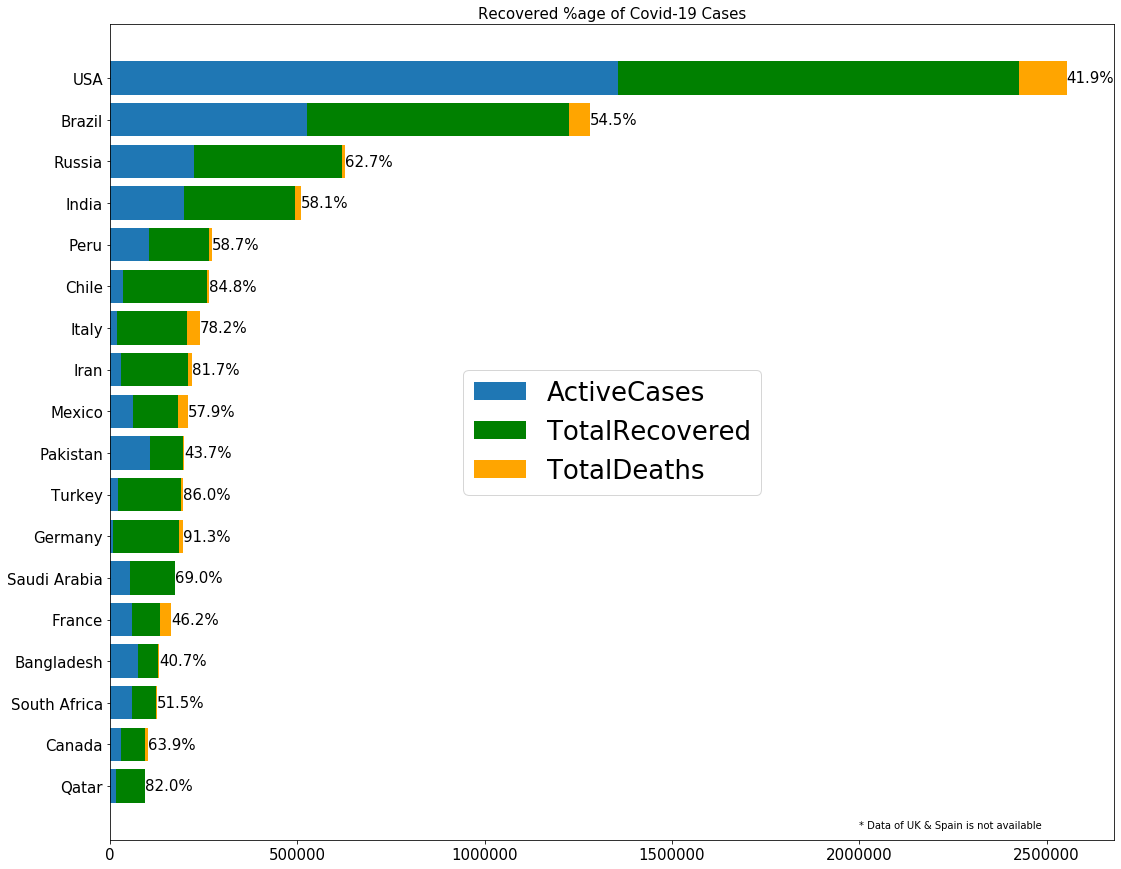

In [262]:
fig, ax = plt.subplots(figsize = (18,15))


indx = np.arange(1, 2)
w = 0.3


y = nndf['Country,Other']
x1 = nndf['ActiveCases']
x2 = nndf['TotalRecovered']
x3 = nndf['TotalDeaths']

# y,x = zip(*sorted(zip(y,x)))

ax.barh(y, x1, label = 'ActiveCases')
ax.barh(y, x2, label = 'TotalRecovered', left = x1, color = 'g')
ax.barh(y, x3, label = 'TotalDeaths', color = 'orange', left = list(map(lambda Active, Recovered: Active + Recovered, x1 , x2)))
ax.invert_yaxis()

rects = ax.patches
labels = [i for i in nndf['Recovered %age']]

for i, v in enumerate(nndf['TotalCases']):
    plt.text(v, i, s= str(nndf[nndf['TotalCases'] == v]['Recovered %age'].item()) + '%', fontdict=dict(fontsize=15), va = 'center', ha = 'left', alpha=1)
plt.text(2000000, 18, "* Data of UK & Spain is not available", fontsize = 10)
plt.legend( loc = 'center', prop={'size': 26})
plt.xticks(size = 15)
# ax.xaxis.tick_top()
plt.yticks(size = 15)
plt.title('Recovered %age of Covid-19 Cases', fontsize = 15)
plt.savefig(r'C:\Users\Madhur\Desktop\j_pig.png', bbox_inches = 'tight')
plt.show()

In [ ]:


'''
for p in ax.patches:
    percentage ='{:,.0f}'.format(p.get_width())
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))


    


# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label,
#             ha='center', va='bottom')    

for i, v in enumerate(nndf['Country,Other']):
    ax.text(i ,v, s= nndf[nndf['Country,Other'] == v]['Recovered %age'].item(), fontdict=dict(fontsize=10), va = 'center', ha = 'center', alpha=1)
#     ax.text(int(v) + 3, int(i) + .25, str(v), color='blue', fontweight='bold')

    
for i, j in enumerate(nndf['Recovered %age']):
    ax.text(i,j, s=j, fontsize=10,  va = 'center', ha = 'center', alpha=1)
    
 xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)b

ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')
'''

In [191]:
plt.legend?

ValueError: `bins` must increase monotonically, when an array

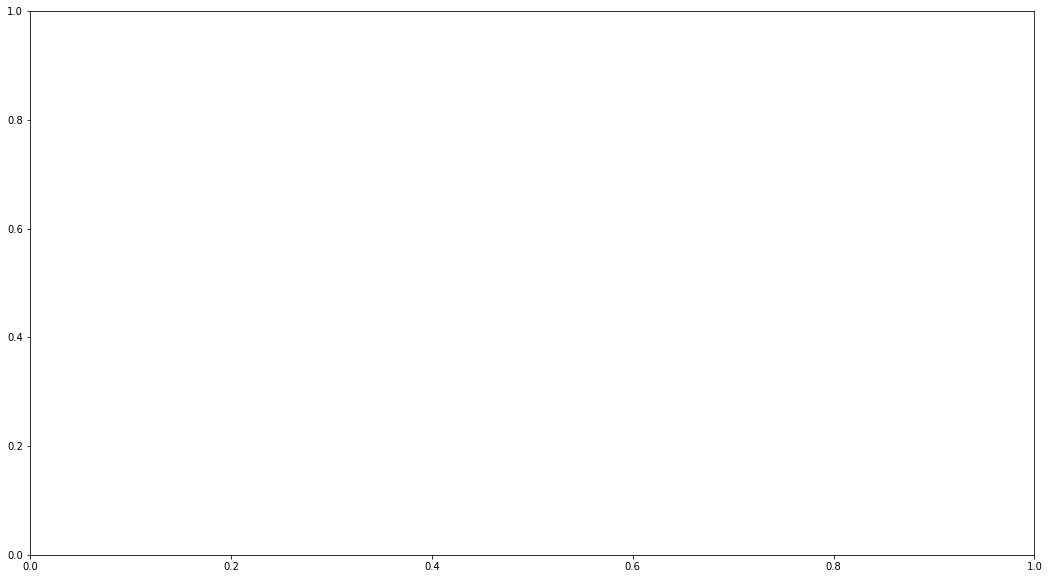

In [65]:
indf = nndf[nndf['Country,Other'] == 'India']


x = len()



indx = np.arange(1, x+1)
bar_width = 0.30

# b1 = plt.bar(indx, y1, bar_width, color = 'green', label = 'Total Tests/10')
b2 = 
b3 = ax.hist(indx+w, y3, width = 0.3, label = 'TotalRecovered', bottom = nndf['ActiveCases'])


#b2 = plt.bar(indx + bar_width, y2, bar_width, color = 'blue', label = 'Active Cases')
#b3 = plt.bar(indx + bar_width + bar_width, y3, bar_width,color = 'red', label = 'Recovered Cases')

plt.ticklabel_format(useOffset = False, style = 'plain')

plt.xticks(indx+bar_width, nndf['Country,Other'], fontsize = '20')
plt.yticks(fontsize = '15')
plt.title('Population/100 V/S Total Test V/S Total Cases of Top 10 Countries')


'''
for i, j in enumerate(nndf['TotalCases']):
    plt.text(i,j, s=j, fontdict=dict(fontsize=15), ha='center', verticalalignment='bottom', alpha=0.8)
'''
plt.show()

# Below code is not updated.


In [81]:
import json
import requests
import pandas as pd

df = pd.DataFrame()
for i  in range(1,7):
    r = requests.get(f"https://api.covid19india.org/raw_data{i}.json")
    r_text = r.text
    data = json.loads(r_text)
    data = data['raw_data']
    data_serialized = json.dumps(data)
    df1 = pd.DataFrame(data)
    df = df.append(df1)

C:\Users\Madhur\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [82]:
df.shape

(101559, 22)

In [87]:
df.isnull().sum()

index                                      0
agebracket                                 0
backupnotes                            73376
contractedfromwhichpatientsuspected        0
currentstatus                              0
dateannounced                              0
detectedcity                               0
detecteddistrict                           0
detectedstate                              0
entryid                                28183
estimatedonsetdate                     73376
gender                                     0
nationality                                0
notes                                      0
numcases                                   0
patientnumber                              0
source1                                    0
source2                                    0
source3                                    0
statecode                                  0
statepatientnumber                         0
statuschangedate                           0
typeoftran

In [88]:
import numpy as np
df.replace(r'^\s*$', np.nan, regex = True, inplace = True)

In [89]:
df.isnull().sum()

index                                       0
agebracket                              63627
backupnotes                            101198
contractedfromwhichpatientsuspected     99647
currentstatus                            1137
dateannounced                            1121
detectedcity                            93621
detecteddistrict                         9021
detectedstate                            1162
entryid                                 29306
estimatedonsetdate                     101559
gender                                  60917
nationality                             98850
notes                                   63174
numcases                                 1138
patientnumber                             491
source1                                  3048
source2                                 96468
source3                                101064
statecode                                1163
statepatientnumber                      78306
statuschangedate                  

In [92]:
pd.set_option('display.max_columns',None)
df.reset_index(inplace = True)
df.dropna(subset = ['dateannounced'], inplace = True)
df.shape

(100438, 24)

In [93]:
df.dtypes

level_0                                  int64
index                                    int64
agebracket                              object
backupnotes                             object
contractedfromwhichpatientsuspected     object
currentstatus                           object
dateannounced                           object
detectedcity                            object
detecteddistrict                        object
detectedstate                           object
entryid                                 object
estimatedonsetdate                     float64
gender                                  object
nationality                             object
notes                                   object
numcases                                object
patientnumber                           object
source1                                 object
source2                                 object
source3                                 object
statecode                               object
statepatientn

In [94]:
df['dateannounced'] = pd.to_datetime(df['dateannounced'], format = '%d/%m/%Y')
# print(df['dateannounced'].dtype)
df['datetimestr'] = df['dateannounced'].dt.strftime('%m-%d')
df.head()

,level_0,index,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,entryid,estimatedonsetdate,gender,nationality,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission,datetimestr
0,0,0,20,Student from Wuhan,NaN,Recovered,2020-01-30,Thrissur,Thrissur,Kerala,NaN,NaN,F,India,Travelled from Wuhan,1,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,KL,KL-TS-P1,14/02/2020,Imported,01-30
1,1,1,NaN,Student from Wuhan,NaN,Recovered,2020-02-02,Alappuzha,Alappuzha,Kerala,NaN,NaN,NaN,India,Travelled from Wuhan,1,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,KL,KL-AL-P1,14/02/2020,Imported,02-02
2,2,2,NaN,Student from Wuhan,NaN,Recovered,2020-02-03,Kasaragod,Kasaragod,Kerala,NaN,NaN,NaN,India,Travelled from Wuhan,1,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported,02-03
3,3,3,45,Travel history to Italy and Austria,NaN,Recovered,2020-03-02,East Delhi (Mayur Vihar),East Delhi,Delhi,NaN,NaN,M,India,"Travelled from Austria, Italy",1,4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,DL,DL-P1,15/03/2020,Imported,03-02
4,4,4,24,"Travel history to Dubai, Singapore contact",NaN,Recovered,2020-03-02,Hyderabad,Hyderabad,Telangana,NaN,NaN,M,India,"Travelled from Dubai to Bangalore on 20th Feb,...",1,5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported,03-02


In [96]:
df.dtypes

level_0                                         int64
index                                           int64
agebracket                                     object
backupnotes                                    object
contractedfromwhichpatientsuspected            object
currentstatus                                  object
dateannounced                          datetime64[ns]
detectedcity                                   object
detecteddistrict                               object
detectedstate                                  object
entryid                                        object
estimatedonsetdate                            float64
gender                                         object
nationality                                    object
notes                                          object
numcases                                       object
patientnumber                                  object
source1                                        object
source2                     

In [97]:
df['numcases'] = pd.to_numeric(df['numcases'])
df.dtypes

level_0                                         int64
index                                           int64
agebracket                                     object
backupnotes                                    object
contractedfromwhichpatientsuspected            object
currentstatus                                  object
dateannounced                          datetime64[ns]
detectedcity                                   object
detecteddistrict                               object
detectedstate                                  object
entryid                                        object
estimatedonsetdate                            float64
gender                                         object
nationality                                    object
notes                                          object
numcases                                      float64
patientnumber                                  object
source1                                        object
source2                     

In [98]:
df.numcases = df.numcases.astype('Int64')
df.numcases.dtype

Int64Dtype()

In [99]:
df['numcases'].unique()

<IntegerArray>
[    1,    -1,     2,    -2,     3,    -3,    19,   -19,    34,   -34,
 ...
  3137,  2228,  1264,   940,   704, -3827,   146,   435, -1935,  -142]
Length: 672, dtype: Int64

In [116]:
ndf = df[df['detectedstate']=='Delhi'][['currentstatus','dateannounced','detectedcity','detecteddistrict','gender','numcases']]

In [117]:
ndf.numcases.sum()

77789

In [127]:
ndf[ndf['dateannounced'] == '18/06/2020']

,currentstatus,dateannounced,detectedcity,detecteddistrict,gender,numcases
98426,Hospitalized,2020-06-18,NaN,NaN,NaN,2877
98427,Recovered,2020-06-18,NaN,NaN,NaN,3884
98428,Deceased,2020-06-18,NaN,NaN,NaN,65


In [128]:
ndf[ndf['currentstatus'] == 'Hospitalized']['numcases'].sum()

53112

In [104]:
df

,level_0,index,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,entryid,estimatedonsetdate,gender,nationality,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission,datetimestr
0,0,0,20,Student from Wuhan,NaN,Recovered,2020-01-30,Thrissur,Thrissur,Kerala,NaN,NaN,F,India,Travelled from Wuhan,1,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,KL,KL-TS-P1,14/02/2020,Imported,01-30
1,1,1,NaN,Student from Wuhan,NaN,Recovered,2020-02-02,Alappuzha,Alappuzha,Kerala,NaN,NaN,NaN,India,Travelled from Wuhan,1,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,KL,KL-AL-P1,14/02/2020,Imported,02-02
2,2,2,NaN,Student from Wuhan,NaN,Recovered,2020-02-03,Kasaragod,Kasaragod,Kerala,NaN,NaN,NaN,India,Travelled from Wuhan,1,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported,02-03
3,3,3,45,Travel history to Italy and Austria,NaN,Recovered,2020-03-02,East Delhi (Mayur Vihar),East Delhi,Delhi,NaN,NaN,M,India,"Travelled from Austria, Italy",1,4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,DL,DL-P1,15/03/2020,Imported,03-02
4,4,4,24,"Travel history to Dubai, Singapore contact",NaN,Recovered,2020-03-02,Hyderabad,Hyderabad,Telangana,NaN,NaN,M,India,"Travelled from Dubai to Bangalore on 20th Feb,...",1,5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported,03-02
5,5,5,69,Italian tourist,NaN,Recovered,2020-03-03,Jaipur,Italians,Rajasthan,NaN,NaN,M,Italy,Travelled from Italy,1,6,https://indianexpress.com/article/india/corona...,https://economictimes.indiatimes.com/news/poli...,https://twitter.com/PTI_News/status/1240878975...,RJ,NaN,03/03/2020,Imported,03-03
6,6,6,55,Italian tourist,P6,Recovered,2020-03-04,Gurugram,Italians,Haryana,NaN,NaN,NaN,Italy,Travelled from Italy,1,7,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,HR,NaN,29/03/2020,Imported,03-04
7,7,7,55,Italian tourist,P6,Recovered,2020-03-04,Gurugram,Italians,Haryana,NaN,NaN,NaN,Italy,Travelled from Italy,1,8,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,HR,NaN,29/03/2020,Imported,03-04
8,8,8,55,Italian tourist,P6,Recovered,2020-03-04,Gurugram,Italians,Haryana,NaN,NaN,NaN,Italy,Travelled from Italy,1,9,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,HR,NaN,29/03/2020,Imported,03-04
9,9,9,55,Italian tourist,P6,Recovered,2020-03-04,Gurugram,Italians,Haryana,NaN,NaN,NaN,Italy,Travelled from Italy,1,10,https://indianexpress.com/article/india/corona...,https://www.indiatoday.in/india/story/coronavi...,NaN,HR,NaN,29/03/2020,Imported,03-04


In [6]:

import json
import requests
import pandas as pd

r1 = requests.get(f"https://api.covid19india.org/raw_data1.json")
r1_text = r1.text
data1 = json.loads(r1_text)
data1 = data1['raw_data']
data_serialized1 = json.dumps(data1)
df1 = pd.DataFrame(data1)
df1.tail()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,...,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
17359,,,,Hospitalized,16/04/2020,,,Maharashtra,,,...,Correction for district count,-2,,,,,MH,,,
17360,,,,Hospitalized,18/04/2020,,Nagpur,Maharashtra,,,...,Correction for district count,1,,,,,MH,,,
17361,,,,Hospitalized,18/04/2020,,,Maharashtra,,,...,Correction for district count,-1,,,,,MH,,,
17362,,,,Hospitalized,19/04/2020,,Nagpur,Maharashtra,,,...,Correction for district count,10,,,,,MH,,,
17363,,,,Hospitalized,19/04/2020,,,Maharashtra,,,...,Correction for district count,-10,,,,,MH,,,


In [7]:
r2 = requests.get(f"https://api.covid19india.org/raw_data2.json")
r2_text = r2.text
data2 = json.loads(r2_text)
data2 = data2['raw_data']
data_serialized2 = json.dumps(data2)
df2 = pd.DataFrame(data2) 

df2.tail()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,...,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
10814,,,,Hospitalized,22/04/2020,,,Maharashtra,,,...,Correction for district count,11,,,,,MH,,,
10815,,,,Hospitalized,24/04/2020,,Nagpur,Maharashtra,,,...,Correction for district count,1,,,,,MH,,,
10816,,,,Hospitalized,24/04/2020,,,Maharashtra,,,...,Correction for district count,-1,,,,,MH,,,
10817,,,,Hospitalized,25/04/2020,,Nagpur,Maharashtra,,,...,Correction for district count,6,,,,,MH,,,
10818,,,,Hospitalized,25/04/2020,,,Maharashtra,,,...,Correction for district count,-6,,,,,MH,,,


In [8]:
r3 = requests.get(f"https://api.covid19india.org/raw_data3.json")
r3_text = r3.text
data3 = json.loads(r3_text)
data3 = data3['raw_data']
data_serialized3 = json.dumps(data3)
df3 = pd.DataFrame(data3) 

df3.tail()

,agebracket,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,entryid,gender,nationality,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
10007,,,Deceased,09/05/2020,,Kamrup Metropolitan,Assam,10008,,,Reconcilation With Assam Dashboard,,37911,https://covid19.assam.gov.in/all-districts/,,,AS,,,
10008,,,Hospitalized,27/04/2020,,Jalandhar,Punjab,,,,Correction for district count,9,,,,,PB,,,
10009,,,Hospitalized,27/04/2020,,,Punjab,,,,Correction for district count,-9,,,,,PB,,,
10010,,,Hospitalized,27/04/2020,,Ludhiana,Punjab,,,,Correction for district count,1,,,,,PB,,,
10011,,,Hospitalized,27/04/2020,,,Punjab,,,,Correction for district count,-1,,,,,PB,,,


In [9]:
r4 = requests.get(f"https://api.covid19india.org/raw_data4.json")
r4_text = r4.text
data4 = json.loads(r4_text)
data4 = data4['raw_data']
data_serialized4 = json.dumps(data4)
df4 = pd.DataFrame(data4) 

df4.tail()

,agebracket,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,entryid,gender,nationality,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
8012,,,,17/05/2020,,,,18021,,,,,,,,,,,,
8013,,,,17/05/2020,,,,18022,,,,,,,,,,,,
8014,,,,17/05/2020,,,,18023,,,,,,,,,,,,
8015,,,,17/05/2020,,,,18024,,,,,,,,,,,,
8016,,,,17/05/2020,,,,18025,,,,,,,,,,,,


In [11]:
df = pd.concat([df1,df2,df3,df4], axis = 0)
df = df.reset_index()
# last = df[df['dateannounced'] == ''].index[0]
# df = df.iloc[0:last,:]
df.tail()

C:\Users\Madhur\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,index,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,entryid,...,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
46207,8012,,NaN,,,17/05/2020,,,,18021,...,,,,,,,,,,
46208,8013,,NaN,,,17/05/2020,,,,18022,...,,,,,,,,,,
46209,8014,,NaN,,,17/05/2020,,,,18023,...,,,,,,,,,,
46210,8015,,NaN,,,17/05/2020,,,,18024,...,,,,,,,,,,
46211,8016,,NaN,,,17/05/2020,,,,18025,...,,,,,,,,,,


In [11]:
import json
import requests
import pandas as pd
'''
for i in '123':
    'request' + i = requests.get(f"'https://api.covid19india.org/raw_data' + '{i}'.json")
    #https://raw.githubusercontent.com/covid19india/api/master/raw_data.json')
    r_text = request.text
    data + i = json.loads(r_text)
#     print(type(data))
    data_serialized + i = json.dumps(data)
#     print(type(data_serialized))
    data + i = data['raw_data']
    df + i = pd.DataFrame(data + i) 

    #     print(type(data1))
# data1
# df = pd.DataFrame(list(data1.items()),columns = ['column1','column2']) 
# df
# l = []
# for i in data1:
#     for p,q in i.items():
#         l.append(q)
'''

r1 = requests.get(f"https://api.covid19india.org/raw_data1.json")
r2 = requests.get(f"https://api.covid19india.org/raw_data2.json")
r3 = requests.get(f"https://api.covid19india.org/raw_data3.json")

r1_text = r1.text
r2_text = r2.text
r3_text = r3.text

data1 = json.loads(r1_text)
data2 = json.loads(r2_text)
data3 = json.loads(r3_text)

data1 = data1['raw_data']
data2 = data2['raw_data']
data3 = data3['raw_data']

data_serialized1 = json.dumps(data1)
data_serialized2 = json.dumps(data2)
data_serialized3 = json.dumps(data3)

# data + i = data['raw_data']
df1 = pd.DataFrame(data1) 
df2 = pd.DataFrame(data2) 
df3 = pd.DataFrame(data3) 


df = pd.concat([df1,df2, df3], axis = 1) 
df.tail()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,...,nationality,notes,numcases,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
17301,,,,Hospitalized,19/04/2020,,Bandipore,Jammu and Kashmir,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17302,,,,Hospitalized,19/04/2020,,Baramula,Jammu and Kashmir,,,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17303,30,,,Hospitalized,19/04/2020,,Munger,Bihar,,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17304,36,,,Hospitalized,19/04/2020,,Munger,Bihar,,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17305,52,,,Hospitalized,19/04/2020,,Munger,Bihar,,M,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
print(df.index)
# print(df[df['dateannounced'] == ''].index[0])

# last = df[df['dateannounced'] == ''].index[0]
# df = df.iloc[0:last,:]
df.tail()

RangeIndex(start=0, stop=30669, step=1)


,index,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,entryid,...,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
30664,2773,,NaN,,,,,,,2774,...,,,NaN,,,,,,,
30665,2774,,NaN,,,,,,,2775,...,,,NaN,,,,,,,
30666,2775,,NaN,,,,,,,2776,...,,,NaN,,,,,,,
30667,2776,,NaN,,,,,,,2777,...,,,NaN,,,,,,,
30668,2777,,NaN,,,,,,,2778,...,,,NaN,,,,,,,


In [14]:
df['dateannounced'] = pd.to_datetime(df['dateannounced'], format = '%d/%m/%Y')
# print(df['dateannounced'].dtype)
df['datetimestr'] = df['dateannounced'].dt.strftime('%m-%d')
df.head()

,index,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,entryid,...,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission,datetimestr
0,0,20,Student from Wuhan,,Recovered,2020-01-30,Thrissur,Thrissur,Kerala,NaN,...,NaN,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported,01-30
1,1,,Student from Wuhan,,Recovered,2020-02-02,Alappuzha,Alappuzha,Kerala,NaN,...,NaN,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported,02-02
2,2,,Student from Wuhan,,Recovered,2020-02-03,Kasaragod,Kasaragod,Kerala,NaN,...,NaN,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported,02-03
3,3,45,Travel history to Italy and Austria,,Recovered,2020-03-02,East Delhi (Mayur Vihar),East Delhi,Delhi,NaN,...,NaN,4,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,,DL,DL-P1,15/03/2020,Imported,03-02
4,4,24,"Travel history to Dubai, Singapore contact",,Recovered,2020-03-02,Hyderabad,Hyderabad,Telangana,NaN,...,NaN,5,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,TG,TS-P1,02/03/2020,Imported,03-02


In [17]:
import matplotlib.pyplot as plt

# df.columns
dfg = df.groupby(df['dateannounced'])['entryid'].count()
dfg

dateannounced
2020-01-30      0
2020-02-02      0
2020-02-03      0
2020-03-02      0
2020-03-03      0
2020-03-04      0
2020-03-05      0
2020-03-06      0
2020-03-07      0
2020-03-08      0
2020-03-09      0
2020-03-10      0
2020-03-11      0
2020-03-12      0
2020-03-13      0
2020-03-14      0
2020-03-15      0
2020-03-16      0
2020-03-17      0
2020-03-18      0
2020-03-19      0
2020-03-20      0
2020-03-21      0
2020-03-22      0
2020-03-23      0
2020-03-24      0
2020-03-25      0
2020-03-26      0
2020-03-27      0
2020-03-28      0
             ... 
2020-04-04      0
2020-04-05      0
2020-04-06      0
2020-04-07      0
2020-04-08      0
2020-04-09      0
2020-04-10      0
2020-04-11      0
2020-04-12      0
2020-04-13      0
2020-04-14      0
2020-04-15      0
2020-04-16      0
2020-04-17      0
2020-04-18      0
2020-04-19      0
2020-04-20      0
2020-04-21      0
2020-04-22      0
2020-04-23      0
2020-04-24      0
2020-04-25      0
2020-04-26      0
2020-04-27    

In [3]:
df.describe()

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,...,notes,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission,datetimestr
count,27891,27891,27891,27891,27891,27891,27891,27891,27891,27891,...,27891,27891,27891,27891,27891,27891,27891,27891,27891,27891
unique,93,223,204,4,59,512,445,33,1,3,...,930,27891,1234,404,115,33,2985,56,6,59
top,,,,Hospitalized,2020-04-25 00:00:00,,,Maharashtra,,,...,Details awaited,7589,https://twitter.com/THMumbai/status/1254064073...,,,MH,,25/04/2020,,04-25
freq,25545,27530,26328,27663,1835,25544,7640,8068,27891,22578,...,23180,1,811,24018,27439,8068,24894,1835,24901,1835
first,NaN,NaN,NaN,NaN,2020-01-30 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-26 00:00:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27891 entries, 0 to 27890
Data columns (total 21 columns):
agebracket                             27891 non-null object
backupnotes                            27891 non-null object
contractedfromwhichpatientsuspected    27891 non-null object
currentstatus                          27891 non-null object
dateannounced                          27891 non-null datetime64[ns]
detectedcity                           27891 non-null object
detecteddistrict                       27891 non-null object
detectedstate                          27891 non-null object
estimatedonsetdate                     27891 non-null object
gender                                 27891 non-null object
nationality                            27891 non-null object
notes                                  27891 non-null object
patientnumber                          27891 non-null object
source1                                27891 non-null object
source2                      

In [8]:
df.isnull().sum()

agebracket                             0
backupnotes                            0
contractedfromwhichpatientsuspected    0
currentstatus                          0
dateannounced                          0
detectedcity                           0
detecteddistrict                       0
detectedstate                          0
estimatedonsetdate                     0
gender                                 0
nationality                            0
notes                                  0
patientnumber                          0
source1                                0
source2                                0
source3                                0
statecode                              0
statepatientnumber                     0
statuschangedate                       0
typeoftransmission                     0
datetimestr                            0
dtype: int64

In [9]:
import numpy as np
np.unique(df['agebracket'])

array(['', '0.3', '0.4', '1', '1.5', '10', '11', '12', '13', '14', '15',
       '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25',
       '26', '27', '28', '28-35', '29', '3', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74',
       '75', '76', '77', '78', '79', '8', '80', '81', '85', '88', '89',
       '9', '90', '92', '96', '98'], dtype=object)

In [10]:
import numpy as np
df.replace(r'^\s*$', np.nan, regex = True, inplace = True)

In [11]:
df['agebracket'] = pd.to_numeric(df['agebracket'], errors='coerce')
df.dtypes

agebracket                                    float64
backupnotes                                    object
contractedfromwhichpatientsuspected            object
currentstatus                                  object
dateannounced                          datetime64[ns]
detectedcity                                   object
detecteddistrict                               object
detectedstate                                  object
estimatedonsetdate                            float64
gender                                         object
nationality                                    object
notes                                          object
patientnumber                                  object
source1                                        object
source2                                        object
source3                                        object
statecode                                      object
statepatientnumber                             object
statuschangedate            

In [12]:
# plt.hist(df['agebracket'], bins = 7)
# plt.show()

In [13]:
df_2 = pd.pivot_table(df.fillna('N/A'), values = ['patientnumber'], columns = ['currentstatus'], index = ['detectedstate'],aggfunc='count', margins=True)
df_2.fillna(0).astype(int).sort_values(('patientnumber','All'), ascending = False)

patientnumber                                  \
currentstatus                    Deceased Hospitalized Migrated Recovered   
detectedstate                                                               
All                                    46        27663        1       181   
Maharashtra                            11         8054        0         3   
Gujarat                                 4         3296        0         1   
Delhi                                   1         2914        1         2   
Rajasthan                               1         2181        0         3   
Madhya Pradesh                          2         2088        0         0   
Tamil Nadu                              1         1878        0         6   
Uttar Pradesh                           1         1864        0         8   
Andhra Pradesh                          0         1095        0         2   
Telangana                               1          999        0         1   
West Bengal                             3          605        0         3   
Jammu and Kashmir                       1          522        0         0   
Karnataka                              12          431        0        60   
Kerala                                  3          408        0        58   
Punjab                                  2          320        0         0   
Haryana                                 0          284        0        12   
Bihar                                   1          276        0         0   
Odisha                                  1          102        0         0   
Jharkhand                               0           82        0         0   
Uttarakhand                             0           50        0         1   
Himachal Pradesh                        1           38        0         1   
Chhattisgarh                            0           29        0         8   
Assam                                   0           36        0         0   
Chandigarh                              0           36        0         0   
Andaman and Nicobar Islands             0           22        0        11   
Ladakh                                  0           20        0         0   
Meghalaya                               0           12        0         0   
Puducherry                              0            8        0         0   
Goa                                     0            7        0         0   
Tripura                                 0            2        0         0   
Manipur                                 0            1        0         1   
Arunachal Pradesh                       0            1        0         0   
N/A                                     0            1        0         0   
Mizoram                                 0            1        0         0   

                                    
currentstatus                  All  
detectedstate                       
All                          27891  
Maharashtra                   8068  
Gujarat                       3301  
Delhi                         2918  
Rajasthan                     2185  
Madhya Pradesh                2090  
Tamil Nadu                    1885  
Uttar Pradesh                 1873  
Andhra Pradesh                1097  
Telangana                     1001  
West Bengal                    611  
Jammu and Kashmir              523  
Karnataka                      503  
Kerala                         469  
Punjab                         322  
Haryana                        296  
Bihar                          277  
Odisha                         103  
Jharkhand                       82  
Uttarakhand                     51  
Himachal Pradesh                40  
Chhattisgarh                    37  
Assam                           36  
Chandigarh                      36  
Andaman and Nicobar Islands     33  
Ladakh                          20  
Meghalaya                       12  
Puducherry                       8  
Goa                            

In [14]:
df3 = df[df['detectedstate'] == 'Uttar Pradesh']
df4 = pd.pivot_table(df3.fillna('N/A'), values = ['patientnumber'], columns = ['typeoftransmission'], index = ['detecteddistrict'],aggfunc='count', margins=True)
df4.fillna(0).astype(int).sort_values(('patientnumber','All'), ascending = False)

patientnumber                      
typeoftransmission       Imported Local   N/A TBD   All
detecteddistrict                                       
All                            18   157  1650  48  1873
Agra                            0    10   362   2   374
Lucknow                         3    15   171   2   191
Saharanpur                      0    14   167   0   181
Kanpur Nagar                    1     1   168   0   170
Gautam Buddha Nagar             6    23    69  19   117
Moradabad                       1     0   103   0   104
Meerut                          0     6    68  15    89
Firozabad                       0     7    76   0    83
Ghaziabad                       2     2    50   4    58
Rae Bareli                      0     2    41   0    43
Bulandshahr                     0     3    32   3    38
Varanasi                        1     0    34   1    36
Bijnor                          0     1    26   0    27
Hapur                           0     3    22   0    25
Amroha                          0     0    25   0    25
Shamli                          0    17     7   0    24
Basti                           0     0    22   1    23
Muzaffarnagar                   0     0    20   0    20
Rampur                          0     0    20   0    20
Sant Kabir Nagar                0     0    20   0    20
Sitapur                         0    10     7   0    17
Baghpat                         1     1    13   0    15
Budaun                          0     1    13   0    14
Sambhal                         0     0    13   0    13
Aligarh                         0     0    13   0    13
Auraiya                         0     1     9   0    10
Bahraich                        0     0     9   0     9
Mathura                         0     1     8   0     9
Azamgarh                        0     4     4   0     8
Kannauj                         0     0     7   0     7
Ghazipur                        0     5     2   0     7
Mahrajganj                      0     6     0   0     6
Pratapgarh                      0     3     3   0     6
Bareilly                        0     5     0   1     6
Jaunpur                         1     3     1   0     5
Shrawasti                       0     0     5   0     5
Mainpuri                        0     0     5   0     5
Mirzapur                        0     2     2   0     4
Hathras                         0     4     0   0     4
Prayagraj                       0     1     3   0     4
Banda                           0     2     2   0     4
Kheri                           1     0     3   0     4
N/A                             0     0     4   0     4
Kasganj                         0     0     3   0     3
Etah                            0     0     3   0     3
Etawah                          0     0     3   0     3
Pilibhit                        1     1     0   0     2
Kaushambi                       0     0     2   0     2
Hardoi                          0     1     1   0     2
Sultanpur                       0     0     2   0     2
Balrampur                       0     0     1   0     1
Jalaun                          0     0     1   0     1
Bara Banki                      0     1     0   0     1
Shahjahanpur                    0     1     0   0     1
Gonda                           0     0     1   0     1
Bhadohi                         0     0     1   0     1
Unnao                           0     0     1   0     1
Ayodhya                         0     0     1   0     1
Mau                             0     0     1   0     1

In [14]:
# ndf = df[df['detectedstate'] == 'Uttar Pradesh']
# ndf.to_excel(r'C:\Users\Madhur\Desktop\cov.xlsx')

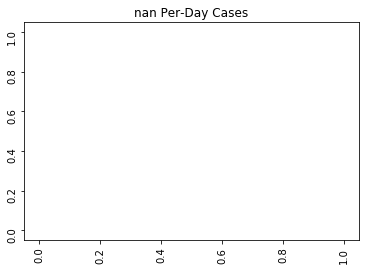

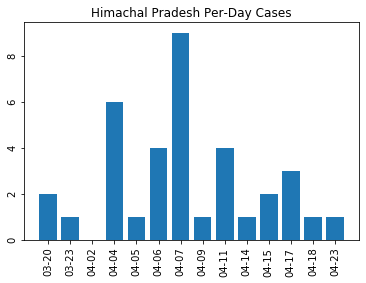

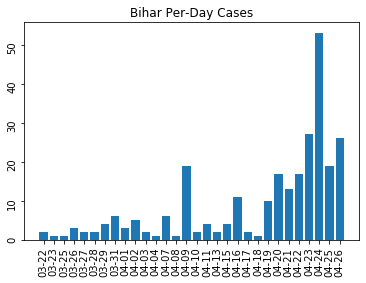

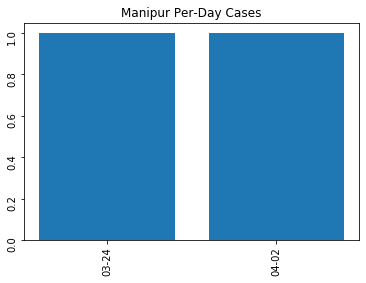

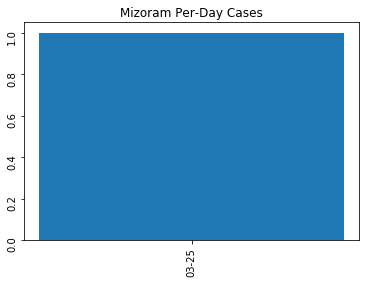

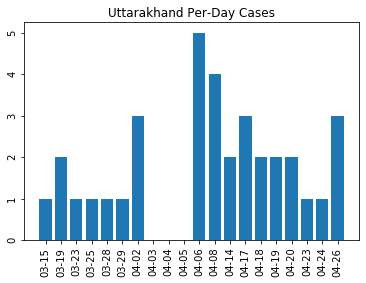

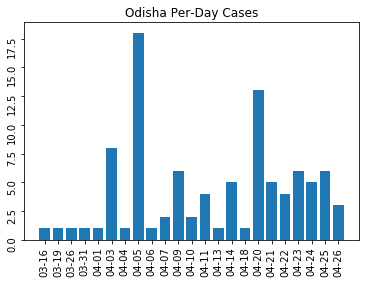

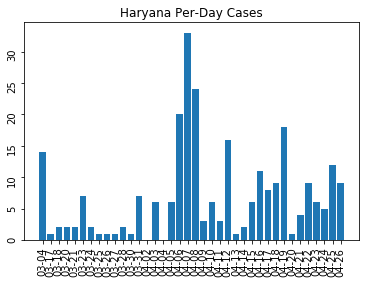

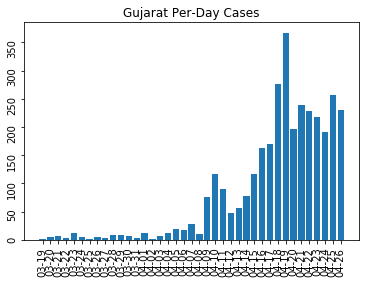

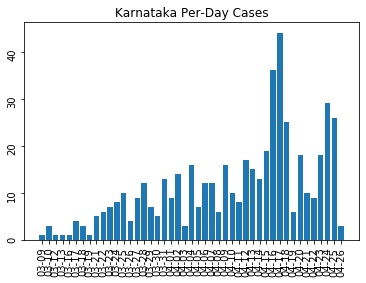

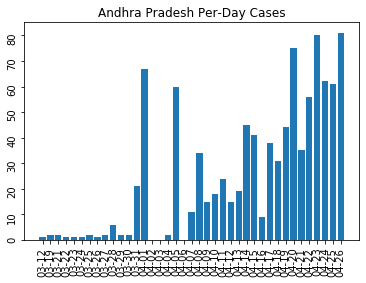

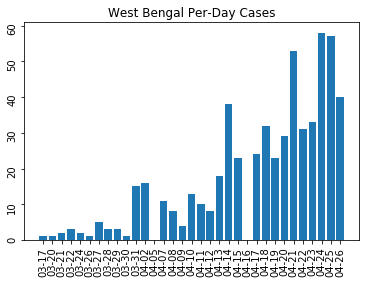

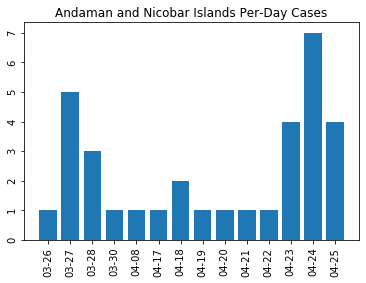

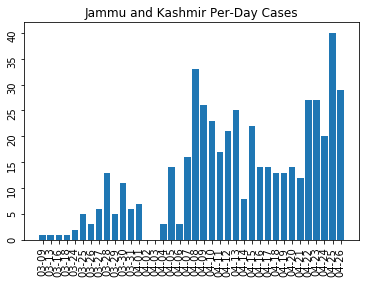

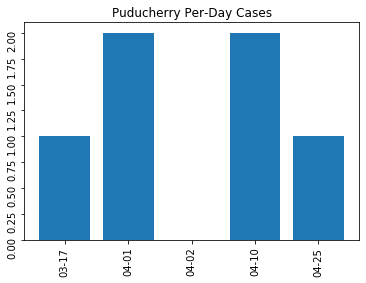

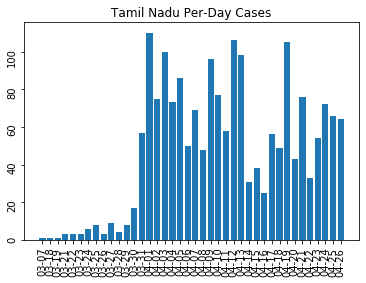

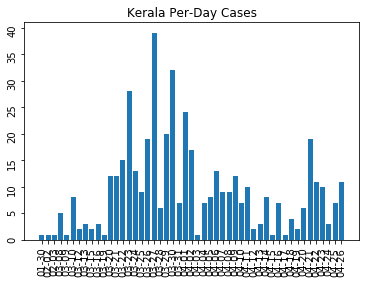

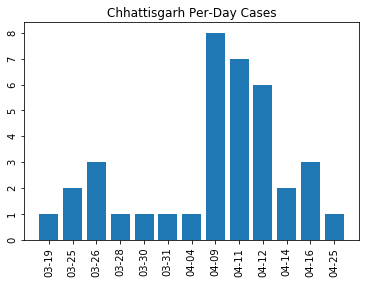

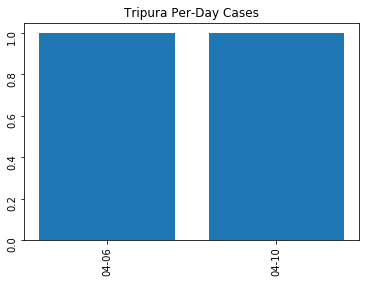

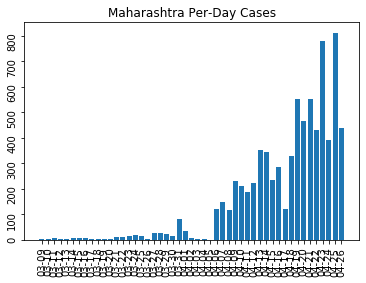

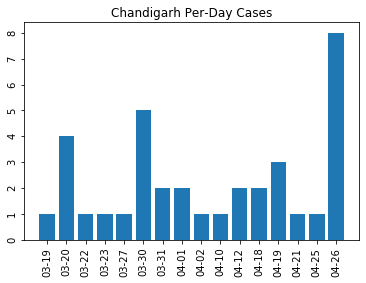

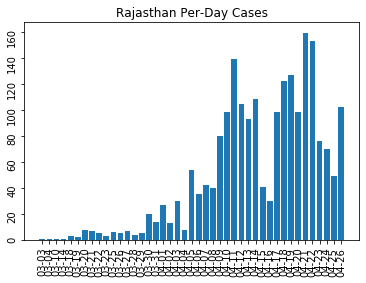

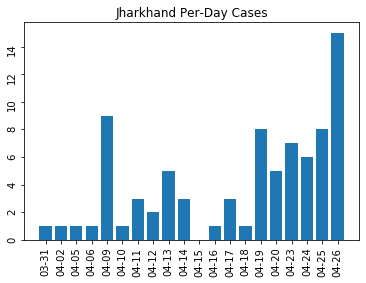

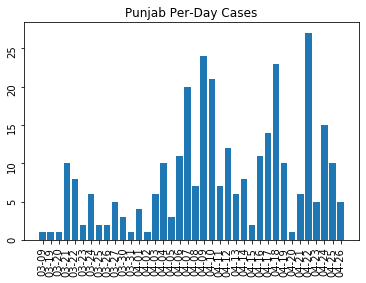

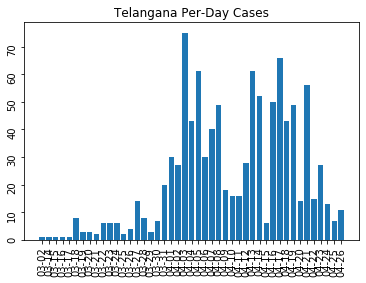

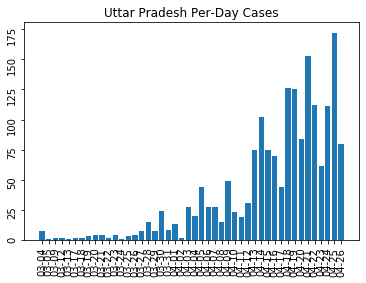

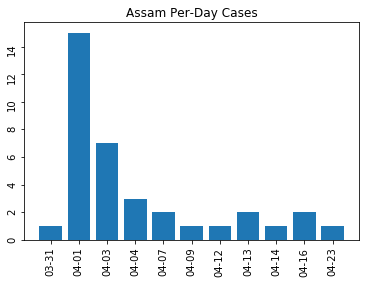

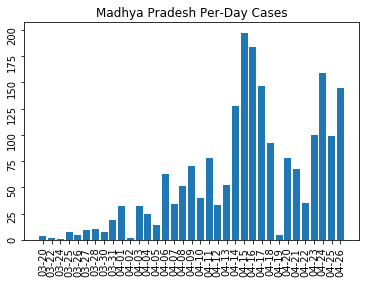

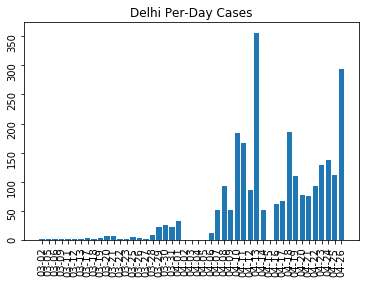

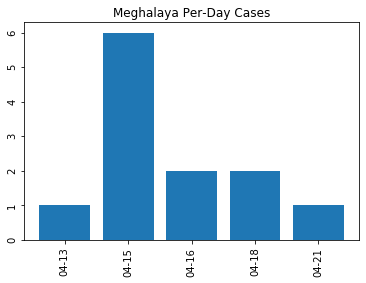

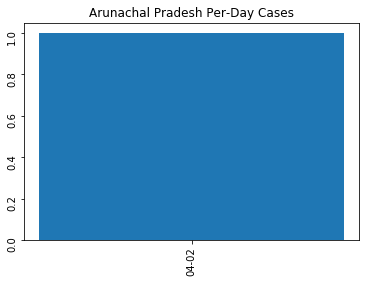

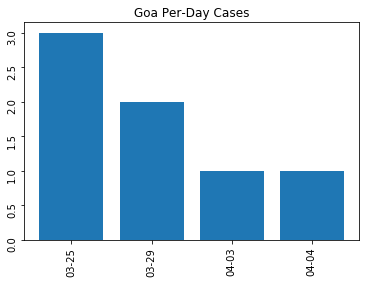

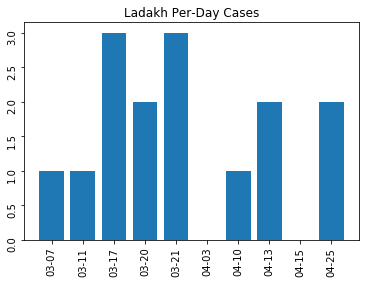

In [12]:
import matplotlib.pyplot as plt

l ={i for i in df.detectedstate}
# l1 = ['Chandigarh','Himachal Pradesh','Uttar Pradesh','Punjab','Delhi','Rajasthan','Haryana','Uttarakhand']

for i in l:
    df2 = df[df['detectedstate'] == i]
    df2 = df2.groupby('datetimestr').agg({'notes': 'count'})
    df2 = df2.reset_index()
    df2 = df2.sort_values('datetimestr', ascending = True)
    s = df2['notes'].sum()
    plt.bar(df2['datetimestr'], df2['notes'], label = f'Total: {s}')
    #
    plt.xticks(rotation = 90)
    plt.yticks(rotation = 90)
    plt.title(f'{i} Per-Day Cases')
#     plt.legend(loc="upper left")
    plt.show()

In [78]:
df5 = df.query("detectedstate in ['Chandigarh','Uttar Pradesh','Delhi','Haryana']")
df5
df5 = pd.pivot_table(df5.fillna('N/A'), values = ['patientnumber'], columns = ['typeoftransmission'], index = ['detectedstate'],aggfunc='count', margins=True)
df5.fillna(0).astype(int).reset_index()
# [('patientnumber','Local')]

detectedstate patientnumber                     
typeoftransmission                     Imported Local  N/A  TBD  All
0                      Chandigarh             5    10    3    0   18
1                           Delhi            15    37  322   71  445
2                         Haryana            20     5   44   15   84
3                   Uttar Pradesh            18    30  116   70  234
4                             All            58    82  485  156  781

In [102]:
df5 = df.query("detectedstate in ['Chandigarh','Uttar Pradesh','Delhi','Haryana']")
df5 = df5.groupby(['detectedstate','typeoftransmission'])['patientnumber'].count().unstack().reset_index()

In [113]:
df5

typeoftransmission,detectedstate,Imported,Local,TBD
0,Chandigarh,5.0,10.0,NaN
1,Delhi,15.0,37.0,71.0
2,Haryana,20.0,5.0,15.0
3,Uttar Pradesh,18.0,30.0,70.0


posx and posy should be finite values
posx and posy should be finite values


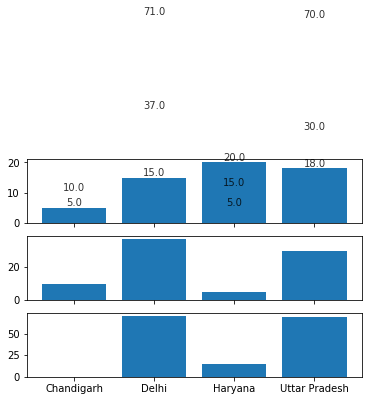

In [123]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(20,10))
fig, (ax1,ax2,ax3) = plt.subplots(nrows = 3, ncols=1, sharex = True)

ax1.bar(df5['detectedstate'], df5['Imported'])
for i, j in enumerate(df5['Imported']):
    ax1.text(i,j, s=j, fontdict=dict(fontsize=10), ha='center', verticalalignment='bottom', alpha=0.8)
ax2.bar(df5['detectedstate'], df5['Local'])
for i, j in enumerate(df5['Local']):
    ax1.text(i,j, s=j, fontdict=dict(fontsize=10), ha='center', verticalalignment='bottom', alpha=0.8) 
ax3.bar(df5['detectedstate'], df5['TBD'])    
for i, j in enumerate(df5['TBD']):
    ax1.text(i,j, s=j, fontdict=dict(fontsize=10), ha='center', verticalalignment='top', alpha=0.8)


# ax3.set_xticks(rotation = 90)
# ax1.set_yticks(rotation = 90)
# ax2.set_yticks(rotation = 90)
# ax3.set_yticks(rotation = 90)




    
    
# for i , j in enamurate(df5['Imported']
# ax1.text(df5['detectedstate'], df5['Imported'], s=df5['Imported'], fontdict=dict(fontsize=10), ha='center', verticalalignment='bottom', alpha=0.8)
    
plt.show()
